# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [12]:
# Import the titanic datas
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [13]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [15]:
# Code here
passengers = df_titanic[df_titanic['embarked'].notna()]

In [16]:
pd.crosstab(passengers['class'], passengers['embarked'])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494
deck crew,23,0,0,43
engineering crew,43,0,0,281
restaurant staff,0,0,0,69
victualling crew,122,0,0,309


In [17]:
df_titanic["type"] = df_titanic["class"].map({
    "1st": "passenger",
    "2nd": "passenger",
    "3rd": "passenger",
    "victualling crew": "crew",
    "engineering crew": "crew",
    "deck crew": "crew"
})

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,passenger
...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN


In [18]:
passengers = df_titanic[df_titanic['type'] == 'passenger']
pd.crosstab(passengers['class'], passengers['embarked'])

embarked,B,C,Q,S
class,,,,
1st,3,143,3,175
2nd,6,26,7,245
3rd,0,102,113,494


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [21]:
# Code here
pd.crosstab(passengers['class'], passengers['embarked'], normalize='columns')

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


In [22]:
pd.crosstab(passengers['class'], passengers['embarked'], normalize='index')

embarked,B,C,Q,S
class,,,,
1st,0.009259,0.441358,0.009259,0.540123
2nd,0.021127,0.091549,0.024648,0.862676
3rd,0.000000,0.143865,0.159379,0.696756


In [23]:
embarked_given_class = pd.crosstab(passengers['class'], passengers['embarked'], normalize='index')
#couldn't figure out the normalize function so I used Gemini to help

In [26]:
embarked_given_class.loc['3rd', 'S']

0.6967559943582511

In [28]:
class_given_embarked = pd.crosstab(passengers['class'], passengers['embarked'], normalize='columns')

In [29]:
class_given_embarked.loc['3rd', 'S']

0.5404814004376368

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

<Axes: xlabel='class'>

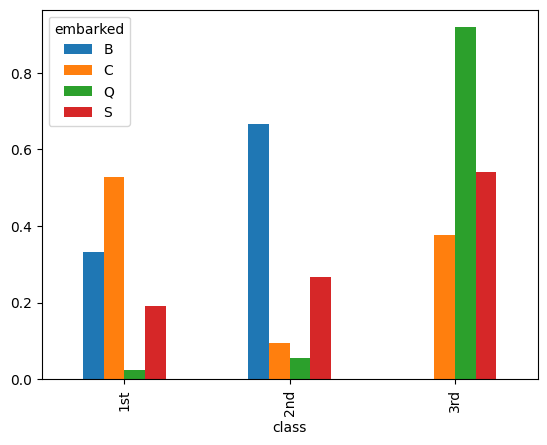

In [30]:
# Code here
class_given_embarked = pd.crosstab(passengers['class'], passengers['embarked'], normalize='columns')
class_given_embarked.plot.bar()

Pros: It's easier to see the general trends across different passenger classes given where they embarked from the visualization.

Cons: We don't know the exact values of the conditional probabilities from this visualization.